In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

import seaborn as sns



# !pip install -U plotly



In [ ]:
import json
import numpy as np

In [ ]:
df_pop = pd.read_excel("UK_census.xlsx", sheet_name="percentage").T
df_pop.columns = ["percentage"]
df_pop

,percentage
White2,87.1
"Gypsy / Traveller / Irish Traveller3,4",0.1
Mixed / Multiple Ethnic Groups5,2.0
Asian / Asian British: Indian,2.3
Asian / Asian British: Pakistani,1.9
Asian / Asian British: Bangladeshi,0.7
Asian / Asian British: Chinese,0.7
Asian / Asian British: Other Asian,1.4
Black / African / Caribbean / Black British6,3.0
Other Ethnic Group,0.9


## Visualising the percentage of ethnicity in the UK



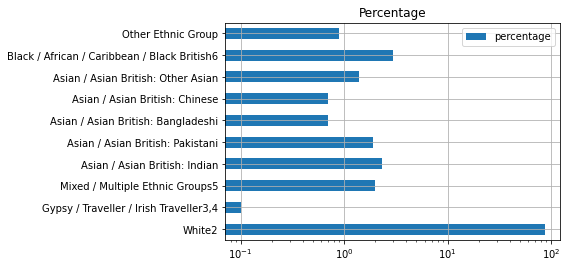

In [ ]:
df_pop.plot(kind ='barh',logx=True, grid=True, title='Percentage')

creating function to get the necessary columns/rows in the excel file.


In [ ]:
def get_data(filename,sheetname = 0):
  head=11
  rows=10
  df = pd.read_excel(filename, sheet_name =sheetname, header= head, nrows = rows,index_col ='Area name')
  df.drop(['Unnamed: 2', 'Unnamed: 3'], 1, inplace=True)
  df.dropna(axis=0,inplace =True)
  print(df)
  print('data length after :', len(df))
  return df


In [ ]:
dfuk = get_data('UK_census.xlsx','KS201UK_Percentages')

                    Area code  ... Other Ethnic Group
Area name                      ...                   
UNITED KINGDOM      K02000001  ...                0.9
GREAT BRITAIN       K03000001  ...                0.9
ENGLAND AND WALES   K04000001  ...                  1
ENGLAND             E92000001  ...                  1
WALES               W92000004  ...                0.5
SCOTLAND           S92000003   ...                0.3
NORTHERN IRELAND   N92000002   ...                0.1

[7 rows x 12 columns]
data length after : 7


#Map try
trying to plot the data with lat and lon





In [ ]:
file1= json.load(open('countries.json'))

In [ ]:
# iits a list with each element == dict

In [ ]:
file1[0]['cca3']

'ABW'

In [ ]:
file1[0]['name']['common']

'Aruba'

In [ ]:
file1[0]['latlng']

[12.5, -69.96666666]

In [ ]:
dfuk['Country Code'] = ''
dfuk['lat']= ''
dfuk['lng'] = ''

In [ ]:
'Anurodh' in 'Anurodh RAINA'

True

In [ ]:
counter=0
for i in dfuk.index:
  for j in range(len(file1)):
    print(str(file1[j]['name']['common']).upper())
    if str(i) in str(file1[j]['name']['common']).upper():
        
      dfuk['Country Code'].loc[i] = file1[j]['cca3']
      dfuk['lat'].loc[i] = file1[j]['latlng'][0]
      dfuk['lng'].loc[i] = file1[j]['latlng'][1]
    counter+=1  


In [ ]:
counter

1750

In [ ]:
56.4907° N, 4.2026° W

In [ ]:
dfuk['lat'].loc['SCOTLAND'] = '56.49'
dfuk['lng'].loc['SCOTLAND'] = '4.20'


In [ ]:
dfuk

,Area code,All categories: Ethnic Group,White2,"Gypsy / Traveller / Irish Traveller3,4",Mixed / Multiple Ethnic Groups5,Asian / Asian British: Indian,Asian / Asian British: Pakistani,Asian / Asian British: Bangladeshi,Asian / Asian British: Chinese,Asian / Asian British: Other Asian,Black / African / Caribbean / Black British6,Other Ethnic Group,Country Code,lat,lng
Area name,,,,,,,,,,,,,,,
UNITED KINGDOM,K02000001,63182178,87.1,0.1,2,2.3,1.9,0.7,0.7,1.4,3,0.9,,54,-2
GREAT BRITAIN,K03000001,61371315,86.7,0.1,2,2.4,1.9,0.7,0.7,1.4,3.1,0.9,,,
ENGLAND AND WALES,K04000001,56075912,85.9,0.1,2.2,2.5,2,0.8,0.7,1.5,3.3,1,GB-EAW,,
ENGLAND,E92000001,53012456,85.3,0.1,2.3,2.6,2.1,0.8,0.7,1.5,3.5,1,,,
WALES,W92000004,3063456,95.5,0.1,1,0.6,0.4,0.3,0.4,0.5,0.6,0.5,,,
SCOTLAND,S92000003,5295403,95.9,0.1,0.4,0.6,0.9,0.1,0.6,0.4,0.7,0.3,,56.49,4.20
NORTHERN IRELAND,N92000002,1810863,98.2,0.1,0.3,0.3,0.1,0,0.3,0.3,0.2,0.1,,,


In [ ]:
# px.choropleth(dfuk, locations= 'Country Code', color= 'White2',lat='lat',lon='lng')

# UK census numbers dataframe


In [ ]:
dfuk_num = get_data('UK_census.xlsx', sheetname='KS201UK_Numbers')

                    Area code  ... Other Ethnic Group
Area name                      ...                   
UNITED KINGDOM      K02000001  ...             580374
GREAT BRITAIN       K03000001  ...             578021
ENGLAND AND WALES   K04000001  ...             563696
ENGLAND             E92000001  ...             548418
WALES               W92000004  ...              15278
SCOTLAND           S92000003   ...              14325
NORTHERN IRELAND   N92000002   ...               2353

[7 rows x 12 columns]
data length after : 7


In [ ]:
dfuk

,Area code,All categories: Ethnic Group,White2,"Gypsy / Traveller / Irish Traveller3,4",Mixed / Multiple Ethnic Groups5,Asian / Asian British: Indian,Asian / Asian British: Pakistani,Asian / Asian British: Bangladeshi,Asian / Asian British: Chinese,Asian / Asian British: Other Asian,Black / African / Caribbean / Black British6,Other Ethnic Group
Area name,,,,,,,,,,,,
UNITED KINGDOM,K02000001,63182178,87.1,0.1,2,2.3,1.9,0.7,0.7,1.4,3,0.9
GREAT BRITAIN,K03000001,61371315,86.7,0.1,2,2.4,1.9,0.7,0.7,1.4,3.1,0.9
ENGLAND AND WALES,K04000001,56075912,85.9,0.1,2.2,2.5,2,0.8,0.7,1.5,3.3,1
ENGLAND,E92000001,53012456,85.3,0.1,2.3,2.6,2.1,0.8,0.7,1.5,3.5,1
WALES,W92000004,3063456,95.5,0.1,1,0.6,0.4,0.3,0.4,0.5,0.6,0.5
SCOTLAND,S92000003,5295403,95.9,0.1,0.4,0.6,0.9,0.1,0.6,0.4,0.7,0.3
NORTHERN IRELAND,N92000002,1810863,98.2,0.1,0.3,0.3,0.1,0,0.3,0.3,0.2,0.1


Firstly removing the unnecessary columns

In [ ]:
dfuk_num.drop('All categories: Ethnic Group',1,inplace=True)
dfuk.drop('All categories: Ethnic Group',1,inplace=True)

#Moving on to the visualisations

[]

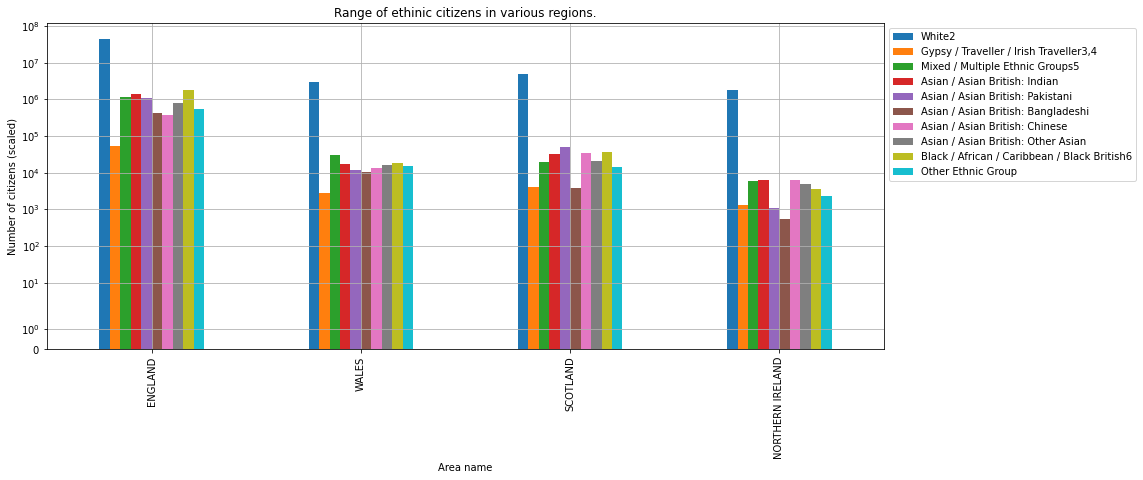

In [ ]:

ax= dfuk_num.loc[
                 'ENGLAND':
                 'NORTHERN IRELAND'
                 ].plot(grid=True,
                        kind = 'bar',
                        figsize=(15,6),
                        ylabel='Number of citizens (scaled)',
                        logy='sym',title='Range of ethinic citizens in various regions.')
# ax.set_title()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()
# grouped bar plot for the ethnicity by regions

[]

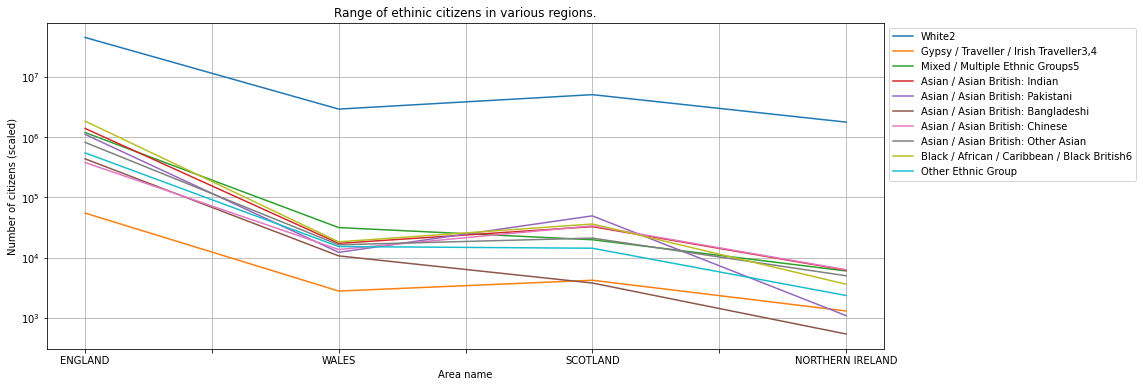

In [ ]:
ax= dfuk_num.loc['ENGLAND':
                 'NORTHERN IRELAND'].plot(grid=True,
                                          kind = 'line',
                                          figsize=(15,6),
                                          ylabel='Number of citizens (scaled)',
                  logy='sym', 
                  title='Range of ethinic citizens in various regions.')
# ax.set_title()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()


Keep in mind that the values are scaled and the gap between white and other ethinicities is much larger than portrayed here.
Gypsy/Traveller/ Irish Traveller seem to be the minority (among others ofcourse) in this case.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13d7eb3750>,
      dtype=object)

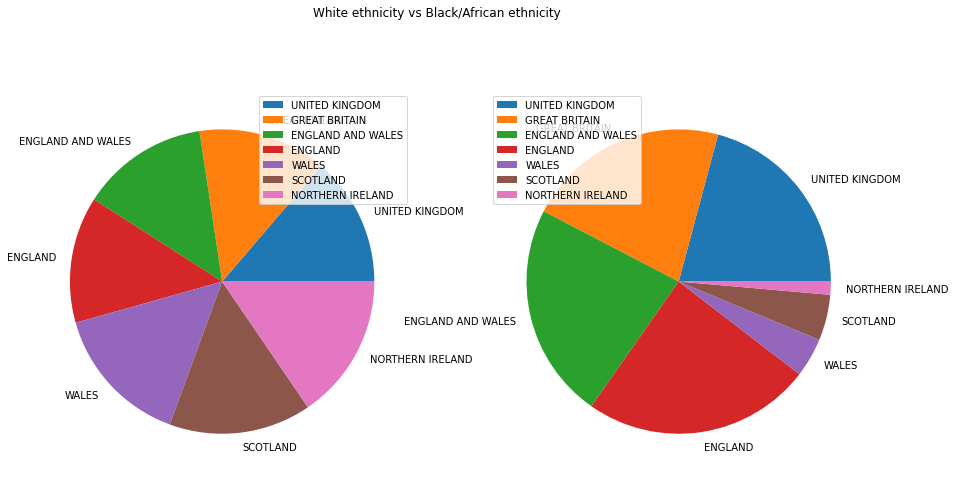

In [ ]:
dfuk[['White2',
      'Black / African / Caribbean / Black British6']].plot(grid=True,
                                                            kind = 'pie',
                                                            subplots=True,
                                                            figsize = (15,8), 
                                                            ylabel='',
                                                            title='White ethnicity vs Black/African ethnicity',)

Here we see a very equal spread for the white ethnicity while the african/black british ethnicity is mostly present in england. This shows the who really is the minority in this case. Racist remarks about 'blacks/africans being everywhere' don't make any sense. 

#Stopsearch Data set

In [ ]:
stop_search = pd.read_csv('stop_search.zip')

In [ ]:
stop_search['Date']= pd.to_datetime(stop_search['Date']) 
stop_search.index = stop_search['Date']
# stop_search.drop('Date',1, inplace= True)

In [ ]:
stop_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Date,,,,,,,,,,,,,,,
2020-01-01 00:55:00+00:00,Person search,2020-01-01 00:55:00+00:00,NaN,NaN,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False
2020-01-01 01:22:00+00:00,Person search,2020-01-01 01:22:00+00:00,NaN,NaN,51.349567,-2.946702,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2020-01-01 02:15:00+00:00,Person search,2020-01-01 02:15:00+00:00,NaN,NaN,51.457808,-2.590766,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,True
2020-01-01 07:00:00+00:00,Person and Vehicle search,2020-01-01 07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Male,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
2020-01-01 07:00:00+00:00,Person and Vehicle search,2020-01-01 07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Female,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


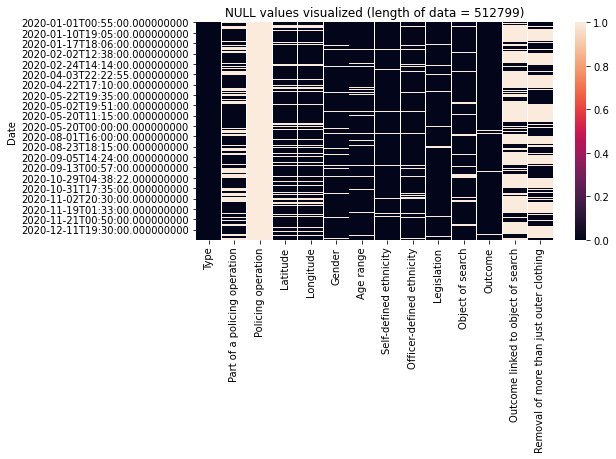

In [ ]:
length = len(stop_search)
plt.figure(figsize=(8,4))
plt.title('NULL values visualized (length of data = {})'.format(length))
sns.heatmap(stop_search.isnull())
plt.show()

A lot of missing data, but since the proportion to available data is low, this data can work

In [ ]:
stop_search.dropna(thresh=length*0.8, axis =1, inplace= True)
stop_search.head()

,Type,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome
Date,,,,,,,,,,
2020-01-01 00:55:00+00:00,Person search,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution
2020-01-01 01:22:00+00:00,Person search,51.349567,-2.946702,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal
2020-01-01 02:15:00+00:00,Person search,51.457808,-2.590766,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal
2020-01-01 07:00:00+00:00,Person and Vehicle search,51.452697,-2.560291,Male,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest
2020-01-01 07:00:00+00:00,Person and Vehicle search,51.452697,-2.560291,Female,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal


In [ ]:
stop_search.isnull().sum()
#still existing null values

Type                             0
Latitude                     91097
Longitude                    91097
Gender                       35741
Age range                    61269
Self-defined ethnicity       22377
Officer-defined ethnicity    40561
Legislation                  21970
Object of search             38386
Outcome                      13106
dtype: int64

In [ ]:
len(stop_search)

512799

500000 instances present

18-24       165939
25-34       111651
over 34      91853
10-17        81843
under 10       244
Name: Age range, dtype: int64

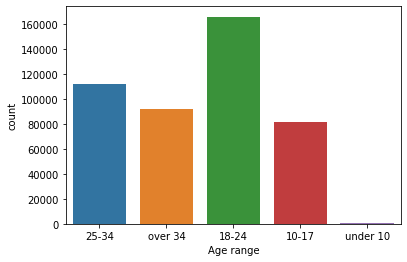

In [ ]:
sns.countplot(x=stop_search['Age range'])
stop_search['Age range'].value_counts()

Here we can perform age based analysis and see if questions about some age groups can be answered. The most apprehended people are between the age group of 18-24

In [ ]:
age10 = stop_search[stop_search['Age range'] == 'under 10']
# segragating the data on the basis of age>10

Male      204
Female     21
Other       1
Name: Gender, dtype: int64


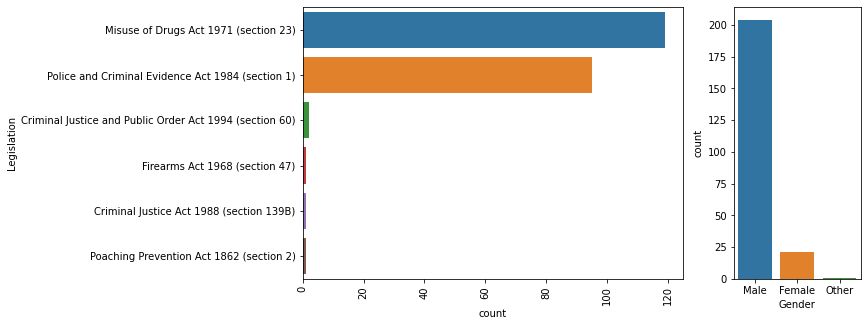

In [ ]:
fig,axes = plt.subplots(1,2,gridspec_kw={'width_ratios': [3,1]},figsize=(10,5))
print(age10.Gender.value_counts())

#general utility function to set tick properties
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

sns.countplot(y=age10['Legislation'], ax=axes[0])
sns.countplot(x=age10['Gender'], ax=axes[1])
# axes[1].figure.


# sns.countplot(x=age10['Officer-defined ethnicity'],ax = axes[1,1])


In [ ]:
age10['Self-defined ethnicity'].value_counts()

White - English/Welsh/Scottish/Northern Irish/British                                   111
Other ethnic group - Not stated                                                          48
White - Any other White background                                                       17
Asian/Asian British - Any other Asian background                                         10
Asian/Asian British - Pakistani                                                          10
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background      7
Black/African/Caribbean/Black British - African                                           6
Other ethnic group - Any other ethnic group                                               5
White - Irish                                                                             5
Black/African/Caribbean/Black British - Caribbean                                         4
Asian/Asian British - Bangladeshi                                               

Majority of the children under 10 seems to be Male, and the cause for the stop and search is Drug related while a criminal act follows the second highest count.


In [ ]:
dfu = stop_search.groupby('Age range')['Officer-defined ethnicity'].value_counts().unstack()

Officer-defined ethnicity,Asian,Black,Mixed,Other,White
Age range,,,,,
10-17,7474,19706,343,2524,46968
18-24,28658,39590,600,6387,82780
25-34,16607,21846,354,3611,64144
over 34,7729,14362,217,1875,63201
under 10,29,25,3,14,155


grouped up data by age and divided on the basis of officer's defined ethnicity

In [ ]:
majority_self = stop_search['Self-defined ethnicity'].value_counts()[:9].keys()

Finding the majority of groups that appear under 'Self-defined ethnicity'

In [ ]:
dfs = stop_search[stop_search['Self-defined ethnicity'].isin(majority_self)]

In [ ]:
dfself = dfs.groupby('Age range')['Self-defined ethnicity'].value_counts().unstack()

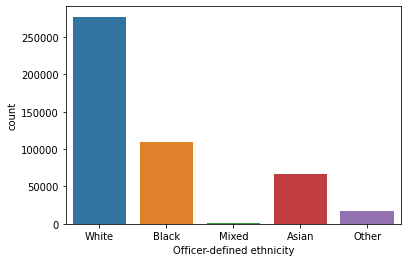

In [ ]:
sns.countplot(x=stop_search['Officer-defined ethnicity'],orient='h')


It's inevitable that the white ethnicity will always be present in a vast amount since it is the majority  race in the region.<br>


[]

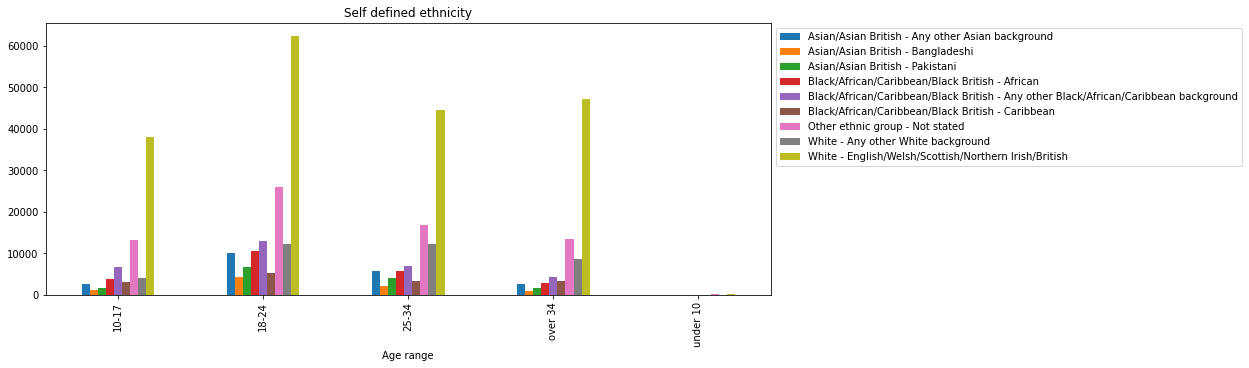

In [ ]:
ax= dfself.plot(kind = 'bar', figsize = (13,5),legend= 'reverse')
ax.set_title("Self defined ethnicity",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

Theres a surge in anonymous / asian and black races between the age of 18-24 <br>
This graph still contains too much diversity, combining a few races might give a better visualisation.

In [ ]:
normal_stop = stop_search.copy()

In [ ]:
#MANUAL NORMALISING
#######################

normal_stop['Self-defined ethnicity'].replace({'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background':'Black',
                                               'Black/African/Caribbean/Black British - African': 'Black',
                                               'Black/African/Caribbean/Black British - Caribbean':'Black',
                                               'Asian/Asian British - Any other Asian background':'Asian',
                                               'Asian/Asian British - Pakistani':'Asian',
                                               'Asian/Asian British - Bangladeshi':'Asian',
                                               'Asian/Asian British - Chinese':'Asian',
                                               'Asian/Asian British - Indian':'Asian',
                                               'White - Any other White background':'White',
                                               'White - English/Welsh/Scottish/Northern Irish/British':'White'}, inplace = True)

Now after normalising lets check out the distribution. Let's take the top 5. Note that this does not contains the total categories.

In [ ]:
maj_cats =normal_stop['Self-defined ethnicity'].value_counts()[:5].keys() 
normal_stop['Self-defined ethnicity'].value_counts()[:5]

In [ ]:
normal_stop_maj = normal_stop[normal_stop['Self-defined ethnicity'].isin(maj_cats)]

In [ ]:
n_s = normal_stop_maj.groupby('Age range')['Self-defined ethnicity'].value_counts().unstack()

[]

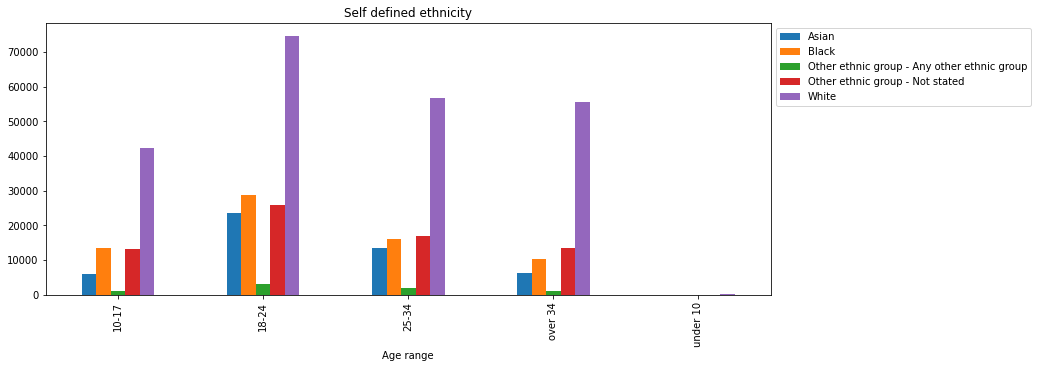

In [ ]:
ax= n_s.plot(kind = 'bar', figsize = (13,5),legend= 'reverse')
ax.set_title("Self defined ethnicity",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

Earlier the anonymous group seemed more than the balck ethnicity, but combining them resulted in a much more truer form of representation.

#Time based

making a month column to divide the data

In [ ]:
stop_search['Month'] = stop_search['Date'].apply(lambda row: row.month)
stop_search['Self-defined ethnicity'] = normal_stop['Self-defined ethnicity']

In [ ]:
stop_search.head(1)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Month
Date,,,,,,,,,,,,,,,,
2020-01-01 00:55:00+00:00,Person search,2020-01-01 00:55:00+00:00,NaN,NaN,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,1


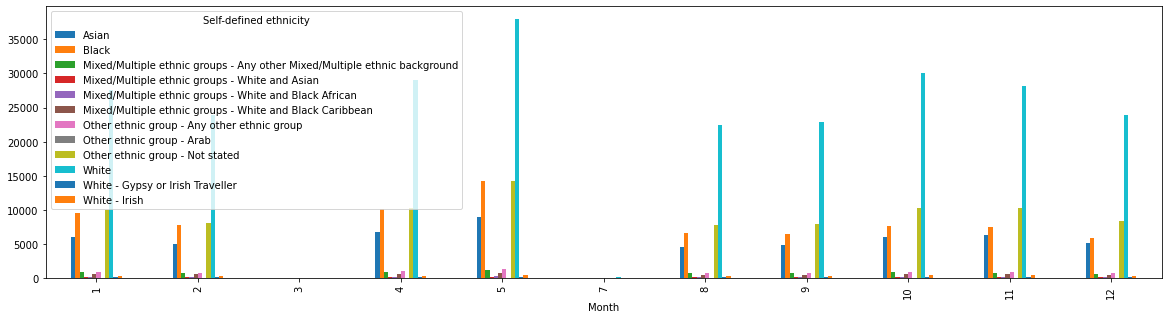

In [ ]:
stop_search[stop_search['Self-defined ethnicity'].isin(maj_cats)].groupby('Month')['Self-defined ethnicity'].value_counts().unstack()

In [ ]:
from scipy import stats

In [ ]:
stats.chi2_contingency(pd.crosstab(stop_search['Self-defined ethnicity'],stop_search['Outcome']))

(6479.537453678991,
 0.0,
 66,
 array([[3.96643283e+04, 6.07713940e+03, 1.95745754e+02, 3.45168997e+03,
         8.95474328e+02, 8.20697493e+02, 9.74924714e+02],
        [5.71484678e+04, 8.75595832e+03, 2.82030993e+02, 4.97320393e+03,
         1.29020175e+03, 1.18246309e+03, 1.40467407e+03],
        [5.49040213e+03, 8.41207718e+02, 2.70954520e+01, 4.77788653e+02,
         1.23953042e+02, 1.13602309e+02, 1.34950696e+02],
        [1.15002181e+03, 1.76199702e+02, 5.67542412e+00, 1.00077801e+02,
         2.59632534e+01, 2.37951846e+01, 2.82668264e+01],
        [1.26426239e+03, 1.93702984e+02, 6.23920797e+00, 1.10019304e+02,
         2.85423845e+01, 2.61589447e+01, 3.10747893e+01],
        [3.70748753e+03, 5.68039835e+02, 1.82966653e+01, 3.22634923e+02,
         8.37014022e+01, 7.67118932e+01, 9.11277555e+01],
        [6.11872530e+03, 9.37475768e+02, 3.01962631e+01, 5.32466921e+02,
         1.38138263e+02, 1.26602989e+02, 1.50394492e+02],
        [6.16899116e+01, 9.45177212e+00, 3.04443280e

[]

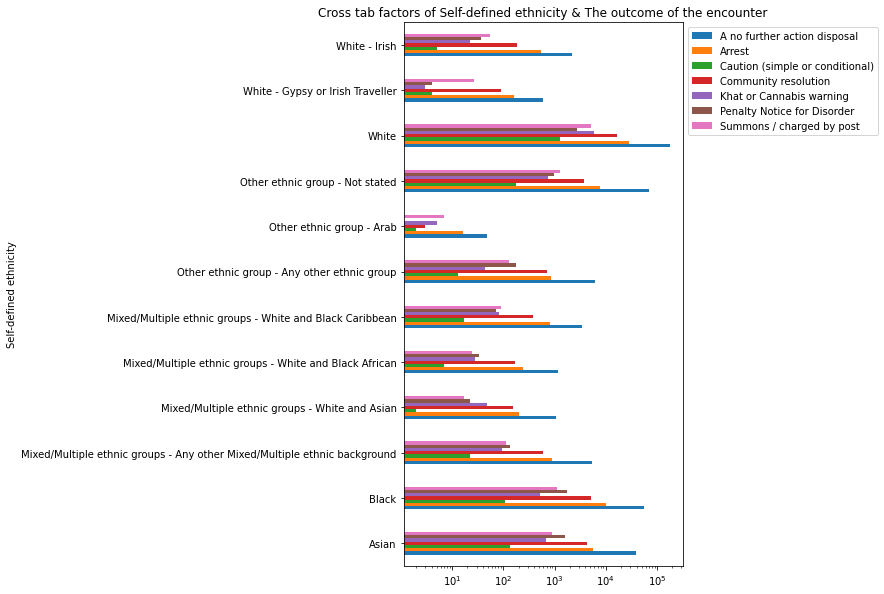

In [ ]:
ax = pd.crosstab(stop_search['Self-defined ethnicity'],stop_search['Outcome']).plot(kind='barh', figsize=(5,10),logx=True)

ax.set_title("Cross tab factors of Self-defined ethnicity & The outcome of the encounter", color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

Even though theres a huge gap in the distribution of white and other ethnicities, outcomes sure are mostly similar.

In [ ]:
grp = stop_search.groupby('Month')['']

In [ ]:
# grp = new_reg.groupby(['District','Make']).sum()
# total_price = grp["rev"].groupby(level=0, group_keys=False)
# oo = total_price.nlargest(3)
# ax = oo.plot(kind='bar',figsize=(20,8),rot=55 )

# #draw lines and titles
# count = oo.groupby("District").count()
# cs = np.cumsum(count)
# for i in range(len(count)):
#     title = count.index.values[i]
#     ax.axvline(cs[i]-.5, lw=0.8, color="k")
#     ax.text(cs[i]-(count[i]+1)/2., 1.02, title, ha="center",
#             transform=ax.get_xaxis_transform())

# # shorten xticklabels
# ax.set_xticklabels([l.get_text().split(", ")[1][:-1] for l in ax.get_xticklabels()])

In [ ]:
%%shell

jupyter nbconvert --to html /content/UK_Police.ipynb

[NbConvertApp] Converting notebook /content/UK_Police.ipynb to html
[NbConvertApp] Writing 939874 bytes to /content/UK_Police.html


In [ ]:
!pip install nbconvert

the percentage of whites stopped

In [ ]:
246019/55010359
#white

0.004472230403004642

  1904684 black in total population

  55010359 white in total population

the percentage of blacks stopped

In [ ]:
87218 / 1904684
# black

0.045791322865105184

for every 1 white person stopped, 10 balck people are stopped

In [ ]:
0.004 * 250 
#white

1.0

In [ ]:
0.045 * 250
#black

11.25

In [ ]:
1/0.004

250.0